
# Tutorial: Establishing a Baseline: The "Good Enough" Model

Selamat datang di Chapter 4! Sebelum kita menyelam ke dalam perbandingan model-model yang kompleks, kita perlu melakukan satu langkah yang sangat penting: menetapkan sebuah **baseline**.

**Apa itu baseline?** Baseline adalah model yang sangat sederhana yang kita gunakan sebagai titik perbandingan. Tujuannya adalah untuk menetapkan skor "minimum" yang harus bisa dikalahkan oleh model-model canggih kita. Jika model kompleks Anda tidak bisa mengalahkan baseline yang sederhana, maka kompleksitas tersebut tidak ada gunanya.

Di notebook ini, kita akan belajar cara membuat dua jenis baseline: model "bodoh" (`DummyRegressor`) dan model sederhana namun masuk akal (`LinearRegression`).




---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan mengapa membuat baseline adalah langkah pertama yang krusial dalam pemilihan model.
* Mengimplementasikan `DummyRegressor` dari Scikit-learn untuk membuat baseline performa terendah.
* Menggunakan model sederhana seperti `LinearRegression` sebagai baseline yang lebih kuat.
* Menggunakan skor baseline untuk memberikan konteks pada performa model yang lebih canggih.




---
### 2. Analogi: Pelari Cepat

Bayangkan seseorang memberi tahu Anda, "Saya bisa berlari 100 meter dalam 15 detik." Apakah itu cepat?

Anda tidak akan tahu kecuali Anda memiliki **baseline** atau titik perbandingan.
* Jika baseline-nya adalah pelari Olimpiade (sekitar 9-10 detik), maka 15 detik itu lambat.
* Jika baseline-nya adalah rata-rata orang biasa (mungkin 18-20 detik), maka 15 detik itu cukup cepat.

Dalam *machine learning*, baseline melakukan hal yang sama. Ia memberi tahu kita apakah skor model kita "cepat" (bagus) atau "lambat" (buruk) dalam konteks masalah yang ada.






---
### 3. Setup: Data dan Library

Kita akan menggunakan dataset California Housing dan alur kerja yang sudah kita kenal.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ambil
housing = fetch_california_housing()
X,y = housing.data, housing.target

# split train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/site-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden


---
### 4. Baseline #1: The `DummyRegressor` (Baseline "Bodoh")

`DummyRegressor` adalah model yang membuat prediksi tanpa melihat fitur `X` sama sekali. Ini adalah baseline terendah yang bisa kita bayangkan. Kita akan menggunakan strategi `'mean'`, yang berarti model ini akan **selalu menebak nilai rata-rata dari `y_train`** untuk setiap prediksi.



In [ ]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train,y_train)

y_pred_dummy = dummy_reg.predict(X_test)

#evaluasi
mse_dummy = mean_squared_error(y_test,y_pred_dummy)
rmse = np.sqrt(mse_dummy)
r2_dummy = r2_score(y_test,y_pred_dummy)

print("---- Performa baseline dummy regressor ----")
print(f"RMSE test set: {rmse_dummy:.4f}")
print(f"R2 test set: {r2_dummy:.4f}")

---- Performa baseline dummy regressor ----
RMSE test set: 1.1449
R2 test set: -0.0002


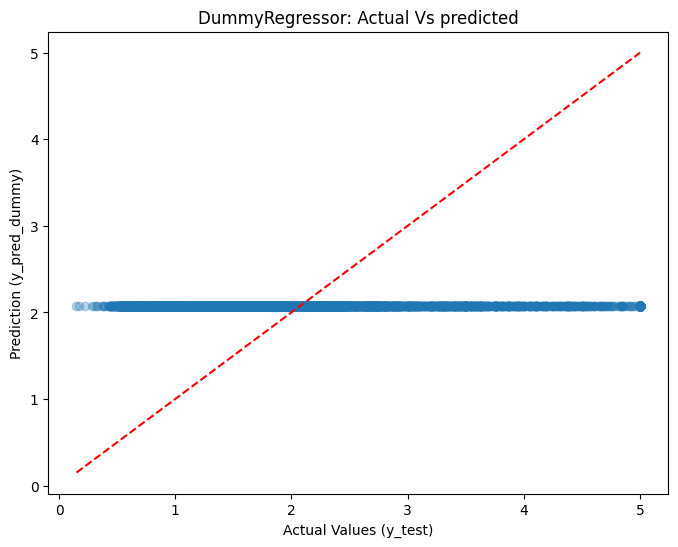

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_dummy, alpha=0.3)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Prediction (y_pred_dummy)")
plt.title("DummyRegressor: Actual Vs predicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.show()


**Analisis Hasil:**

* **RMSE**-nya cukup tinggi. Ini adalah kesalahan rata-rata jika kita hanya menebak nilai rata-rata.
* **R²**-nya mendekati 0.0. Ini sesuai dengan ekspektasi! Skor R² mengukur seberapa lebih baik model kita daripada model yang hanya menebak rata-rata. Karena model kita *adalah* model yang menebak rata-rata, skornya nol.

**Kesimpulan:** Model canggih apa pun yang kita bangun **harus** memiliki R² yang jauh lebih tinggi dari 0 dan RMSE yang jauh lebih rendah dari ini.




---
### 5. Baseline #2: Simple `LinearRegression` (Baseline Masuk Akal)

Sekarang, mari kita buat baseline yang lebih "cerdas". Regresi Linear adalah pilihan yang sangat baik untuk baseline karena cepat, mudah diimplementasikan, dan memberikan titik perbandingan yang kuat untuk model yang lebih kompleks.



In [ ]:
linear_baseline = make_pipeline(
	StandardScaler(),
	LinearRegression()
)

linear_baseline.fit(X_train,y_train)

y_pred_linear = linear_baseline.predict(X_test)

#evaluasi
mse_linear = mean_squared_error(y_test,y_pred_linear)
rmse = np.sqrt(mse_linear)
r2_linear = r2_score(y_test,y_pred_linear)

print("---- Performa baseline linear regressor ----")
print(f"RMSE test set: {rmse_linear:.4f}")
print(f"R2 test set: {r2_linear:.4f}")

---- Performa baseline linear regressor ----
RMSE test set: 0.7456
R2 test set: 0.5758


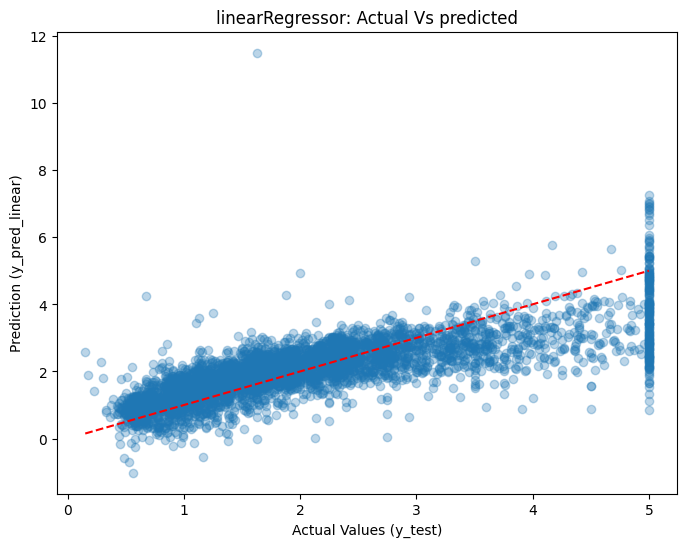

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_linear, alpha=0.3)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Prediction (y_pred_linear)")
plt.title("linearRegressor: Actual Vs predicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.show()


**Analisis Hasil:**

* **RMSE**-nya jauh lebih rendah daripada `DummyRegressor` (misalnya, ~0.74 vs ~1.15).
* **R²**-nya sekitar 0.57. Ini berarti model Regresi Linear kita mampu menjelaskan sekitar 57% variasi dalam harga rumah, yang jauh lebih baik daripada tidak menjelaskan apa pun (R²=0).

**Kesimpulan:** Ini adalah baseline kita yang sebenarnya. Jika kita melatih `RandomForestRegressor` dan hanya mendapatkan R² sebesar 0.6, kita tahu bahwa semua kompleksitas tambahan itu tidak memberikan banyak keuntungan. Kita mencari model yang bisa secara signifikan mengalahkan R² ~0.57 ini.




---
### 6. Kesimpulan Tutorial

Menetapkan baseline adalah langkah pertama yang tidak bisa ditawar dalam proses pemilihan model.

* **`DummyRegressor`** memberi kita "skor terendah" absolut. Ini adalah tes kewarasan (*sanity check*) untuk memastikan model kita setidaknya melakukan sesuatu yang berguna.
* **`LinearRegression`** (atau model sederhana lainnya) memberi kita **baseline performa yang realistis**. Ini adalah skor yang harus kita kalahkan secara signifikan untuk membenarkan penggunaan model yang lebih kompleks dan mahal secara komputasi.

Di subchapter selanjutnya, kita akan belajar cara membandingkan beberapa model canggih secara sistematis untuk melihat mana yang bisa mengalahkan baseline kita.
